In [24]:
import numpy as np
import pandas as pd
import warnings
pd.set_option('display.float_format', '{:0.8f}'.format)
import matplotlib.pyplot as plt

folder_names = ["case_4bus2gen_onetenthperturb",
                "case_9bus3gen_onetenthperturb",
                "case39bus10gen_onetenthperturb"]

case_names = ["IEEE-4", "IEEE-9", "IEEE-39"]
#Loading data frames
num_permutations = 4
# folder_name_1 = "case39bus9gen_halfperturb"
folder_name_1 = "case39bus10gen_onetenthperturb"
# noise_percent_list = [0, 0.0001, 0.001, 0.01]
noise_perc_value = 0.001
snr = "30dB"

# snr_list = ["No noise", "40dB", "30dB", "20dB"]
result_df_dict = {}
for folder_name_, case_name_ in zip(folder_names, case_names):
    print(folder_name_, case_name_)
    print("{}/{}-{}_noise_{}_permutation.csv".format(folder_name_, folder_name_, noise_perc_value,
                                                                   num_permutations))
    result_df_dict[case_name_] = pd.read_csv(
        "{}/{}-{}_noise_{}_permutation.csv".format(folder_name_, folder_name_, noise_perc_value,
                                                                   num_permutations))

#Plotting each of the dataframes
total_relations_list = [6, 12, 49]




# """
# Combined 30dB plots across Case 4, 9, and 39
# """
#
# #Plotting combined image of large and small perturbations
# if folder_name_1 == "case39bus10gen_onetenthperturb":
#     result_df_small = result_dict_up
# elif folder_name_1 == "case39bus9gen_halfperturb":
#     result_df_large = result_dict_up
#
# snr_ = "30dB"
# col = 'green'
# plt.plot(result_df_small[snr_]["#Perturbations"],
#              (total_relations-result_df_small[snr_]["#Incorrect relationship"])*100/total_relations, '.-', label = "Small Perturbation")

# plt.plot(result_df_large[snr_]["#Perturbations"],
#              (total_relations-result_df_large[snr_]["#Incorrect relationship"])*100/total_relations, '.-', label = "Large Perturbation")


case_4bus2gen_onetenthperturb IEEE-4
case_4bus2gen_onetenthperturb/case_4bus2gen_onetenthperturb-0.001_noise_4_permutation.csv
case_9bus3gen_onetenthperturb IEEE-9
case_9bus3gen_onetenthperturb/case_9bus3gen_onetenthperturb-0.001_noise_4_permutation.csv
case39bus10gen_onetenthperturb IEEE-39
case39bus10gen_onetenthperturb/case39bus10gen_onetenthperturb-0.001_noise_4_permutation.csv


IEEE-4
6
IEEE-9
12
IEEE-39
49


/var/folders/1h/sr7kc8_d5pddvym2zw5gv28r0000gn/T/ipykernel_71166/240521498.py:26: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(result_df["#Perturbations"],


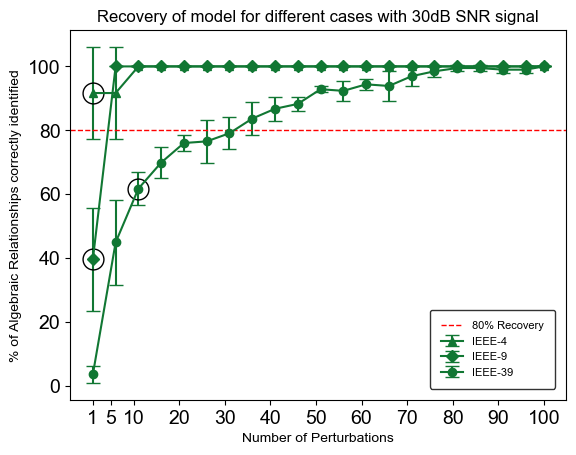

In [29]:
markers = ['^', 'D', 'o']
plt.xticks(fontsize=14)  # Increase font size of x-axis ticks
plt.yticks(fontsize=14)  # Increase font size of y-axis ticks

for case_name_, total_relations, marker_ in zip(case_names, total_relations_list, markers):
    print(case_name_)
    print(total_relations)
    result_df = result_df_dict[case_name_]
    gen_full_recovery_pert_small = \
    result_df[result_df["#Incorrect gen relationship mean"] == 0]["#Perturbations"].iloc[0]
    gen_full_recovery_incorr_small = (total_relations -
                                      result_df[result_df["#Incorrect gen relationship mean"] == 0][
                                          "#Incorrect relationship mean"].iloc[0]) * 100 / total_relations

    label_ = '100% Generator Recovery' if case_name_ == "Case 39" else ''
    # if case_name_ == "Case 319":
    #     col = 'green'
    #     plt.errorbar(result_df["#Perturbations"],
    #                  (total_relations - result_df["#Incorrect relationship mean"]) * 100 / total_relations,
    #                  (result_df["#Incorrect relationship std"]) * 100 / total_relations,
    #                  fmt='-o', label=case_name_, capsize=5, color=col)
    #     plt.plot([gen_full_recovery_pert_small], [gen_full_recovery_incorr_small], marker='o', markersize=15,
    #              linestyle='',
    #              markerfacecolor='none', label='100% Generator Recovery', color='black')  # Square markers, no line
    # else:
    plt.errorbar(result_df["#Perturbations"],
                 (total_relations - result_df["#Incorrect relationship mean"]) * 100 / total_relations,
                 (result_df["#Incorrect relationship std"]) * 100 / total_relations,
                 fmt='-o', label=case_name_, capsize=5, color='#117733', marker=marker_)
    plt.plot([gen_full_recovery_pert_small], [gen_full_recovery_incorr_small], marker='o', markersize=15, linestyle='',
             markerfacecolor='none', label=label_, color='black')  # Square markers, no line




# gen_full_recovery_pert_large = \
# result_df_large[snr_][result_df_large[snr_]["#Incorrect gen relationship mean"] == 0]["#Perturbations"].iloc[0]
# gen_full_recovery_incorr_large = (total_relations -
#                                   result_df_large[snr_][result_df_large[snr_]["#Incorrect gen relationship mean"] == 0][
#                                       "#Incorrect relationship mean"].iloc[0]) * 100 / total_relations
#
# plt.errorbar(result_df_small[snr_]["#Perturbations"],
#              (total_relations - result_df_small[snr_]["#Incorrect relationship mean"]) * 100 / total_relations,
#              (result_df_small[snr_]["#Incorrect relationship std"]) * 100 / total_relations,
#              fmt='-o', label="Small Perturbation", capsize=5, color=col)
#
# plt.errorbar(result_df_large[snr_]["#Perturbations"],
#              (total_relations - result_df_large[snr_]["#Incorrect relationship mean"]) * 100 / total_relations,
#              (result_df_large[snr_]["#Incorrect relationship std"]) * 100 / total_relations,
#              fmt='--^', label="Large Perturbation", capsize=5, color=col)
#
# plt.plot([gen_full_recovery_pert_small], [gen_full_recovery_incorr_small], marker='o', markersize=15, linestyle='',
#          markerfacecolor='none', label='100% Generator Recovery', color='black')  # Square markers, no line
# plt.plot([gen_full_recovery_pert_large], [gen_full_recovery_incorr_large], marker='o', markersize=15, linestyle='',
#          markerfacecolor='none', label='', color='black')  # Square markers, no line

plt.axhline(y=80, color='r', linestyle='--', linewidth=1, label='80% Recovery')

plt.rcParams['font.family'] = 'Arial'
# plt.rcParams['font.size'] = 14
# Set labels for X and Y axes
plt.xlabel('Number of Perturbations')
plt.ylabel('% of Algebraic Relationships correctly identified')
plt.xticks([1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.legend(
    # loc='lower right',
    prop={'size': 8},
    frameon=True,  # Ensure the legend box is visible
    borderpad=1,  # Padding between the border and the legend content
    borderaxespad=1,  # Padding between the legend and the axes
    fancybox=True,  # Rounded border corners (set to False for square corners)
    edgecolor='black'
)

plt.title("Recovery of model for different cases with {} SNR signal".format(snr))

plt.savefig('diff_cases_{}.svg'.format(snr),
            format='svg', bbox_inches='tight')
